In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
from scipy.stats import linregress
from scipy.optimize import curve_fit
from uncertainties.umath import sin, radians 
from uncertainties.umath import *

# PW5 - Wellenoptik

## Beugung am Einzelspalt



### Wichtige Formeln und Zusammenhänge

Bedingung für Minima
$$
b \sin(\alpha_{\min,n}) = n\lambda
$$


Lineare Auswertung
$$
n\lambda = b \alpha_n
$$

 Steigung = 0.004181+/-0.000023
 Achsenabschnitt = 0.000533 +/- 0.000091


,n,α(n)
0,1,0.0047+/-0.0007
1,2,0.0090+/-0.0007
2,3,0.0130+/-0.0007
3,4,0.0173+/-0.0007
4,5,0.0213+/-0.0007
5,6,0.0257+/-0.0007


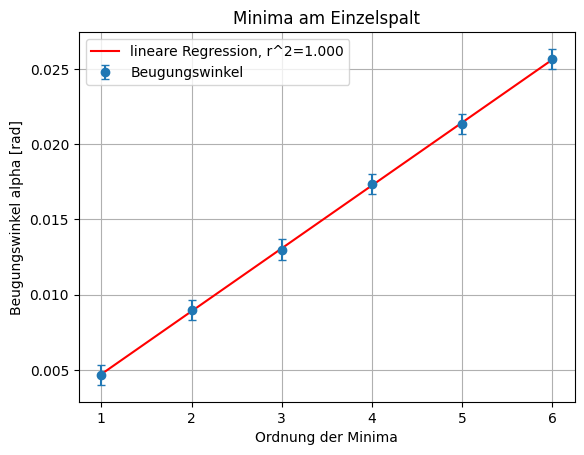

<IPython.core.display.Latex object>

In [41]:
#Einzelspalt

_lambda = 635 * 10**(-6) #Wellenlänge Licht [nm] --> [mm]
n = np.array([1, 2, 3, 4, 5, 6])   #Ordnung der Minima
unsicherheit = 2    #ableseunsicherheit lineal / Millimeterpapier [mm]
a = ufloat(1800-300, unsicherheit)  #entfernung laser [mm] - schirm ##noch ändern!!!
d = unp.uarray([14, 27, 39, 52, 64, 77], unsicherheit)    #abstand zwischen 2 minima n-ter ordnung [mm]
alpha_n = ((d/2)/a)   # winkel berechnen
alpha_nom = np.array(unp.nominal_values(alpha_n))


# #lineare regression
# def func(k,x,z):
#     return k*x + z

#popt, pcov = curve_fit(func, n, alpha_n)

#lineare regressione
slope, intercept, r, _, std = linregress(n, alpha_nom)
res = linregress(n, alpha_nom)
r_2 = r**2
ystd = res.intercept_stderr



steigung = ufloat(slope, std) #evtl mit scidavis nachprüfen?
print(f" Steigung = {steigung}")
print(f" Achsenabschnitt = {intercept:5f} +/- {ystd:5f}")
b = (_lambda / steigung) #[mm]

#ub = (unp.nominal_values(b),unp.std_devs(b)) #falls wir unsicherheit anpassen wollen

# falls der Fehler von b händisch angepasst werden soll: 
# b_wert = unp.nominal_values(b)
# unsicherheit_b = 
# _b = ufloat(b_wert, unsicherheit_b)
# dann in der letzten Zeile _b ersetzen

alpha_n_vals = unp.nominal_values(alpha_n)
alpha_n_errs = unp.std_devs(alpha_n)


#tabelle
tabelle = {
    "n": n,
    "α(n)": alpha_n 
}

#pandas dataframe
df = pd.DataFrame(tabelle)

#tabelle anzeigen
display(df)


#Plot
plt.figure()
plt.errorbar(n, alpha_n_vals, yerr=alpha_n_errs, fmt='o', capsize=3, label="Beugungswinkel") 
plt.plot(n, n*slope+intercept, color="red", markersize=2, label=rf"lineare Regression, r^2={r_2:.3f}") # regressionsfunktion
plt.xlabel("Ordnung der Minima")
plt.ylabel("Beugungswinkel alpha [rad]")
plt.title("Minima am Einzelspalt")
plt.legend()
plt.grid(True)
plt.show()

display(Latex((rf"$$b = ({b:.3f})  mm$$")))



## Beugung am Doppelspalt

### Wichtige Formeln – Doppelspalt

Interferenz-Maxima 
$$
g \sin(\alpha_{\max,k}) = k\lambda
$$

Einzelspalt-Einhüllende 
$$
b \sin(\alpha_{\min,n}) = n\lambda
$$


Spaltenabstand
Für das zentrale Maximum mit k
$$
g = k \cdot b
$$


Steigung = 0.00665+/-0.00007
Achsenabschnitt = 0.000178 +/- 0.000091


,n,α(n)
0,1,0.0070+/-0.0007
1,2,0.0137+/-0.0007
2,3,0.0197+/-0.0007
3,4,0.0267+/-0.0007
4,5,0.0333+/-0.0007
5,6,0.0403+/-0.0007


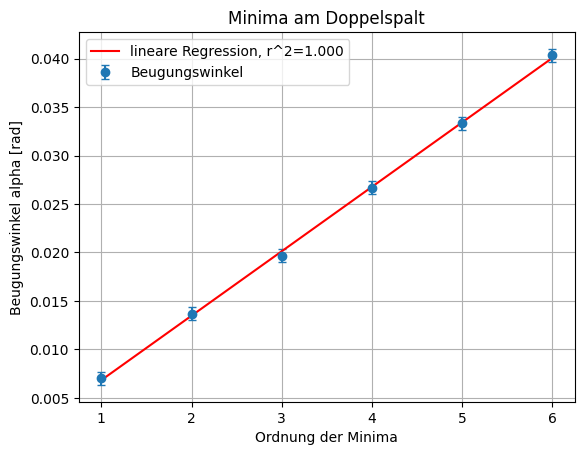

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [49]:
# Doppelspalt

#spaltbreite b - analog einzelspalt
_lambda = 635 * 10**(-6) #Wellenlänge Licht [mm]
n = np.array([1, 2, 3, 4, 5, 6])    #Ordnung der Minima
unsicherheit =2    #ableseunsicherheit lineal / Millimeterpapier [mm]
a = ufloat(1800-300, unsicherheit)  #entfernung laser [mm] - schirm ##noch ändern!!!
d = unp.uarray([21, 41, 59, 80, 100, 121], unsicherheit)    #abstand zwischen 2 minima n-ter ordnung
alpha_n = ((d/2)/a)   # winkel berechnen
alpha_nom = np.array(unp.nominal_values(alpha_n))

# #lineare regression
# def func(k,x,z):
#     return k*x + z

#popt, pcov = curve_fit(func, n, alpha_n)

#lineare regressione
slope, intercept, r, _, std = linregress(n, alpha_nom)
ystd = res.intercept_stderr
r_2 = r**2

steigung = ufloat(slope, std) #evtl mit scidavis nachprüfen?
print(f"Steigung = {steigung}")
print(f"Achsenabschnitt = {intercept:5f} +/- {ystd:5f}")
b = (_lambda / steigung) #[mm]

#Spaltabstand g
k = ufloat(5,1) #wie viele maxima II in erstem Minimum I? (integer, unsicherheit mind. 1) ##noch ändern!!
n_1 = 1

g = b * k  # evtl mal 0.5?

alpha_n_vals = unp.nominal_values(alpha_n)
alpha_n_errs = unp.std_devs(alpha_n)


#tabelle
tabelle = {
    "n": n,
    "α(n)": alpha_n 
}

#pandas dataframe
df = pd.DataFrame(tabelle)

#tabelle anzeigen
display(df)


#Plot (minima einzelspalt)
plt.figure()
plt.errorbar(n, alpha_n_vals, yerr=alpha_n_errs, fmt='o', capsize=3, label="Beugungswinkel") 
plt.plot(n, n*slope+intercept, color="red", markersize=2, label=rf"lineare Regression, r^2={r_2:.3f}") # regressionsfunktion
plt.xlabel("Ordnung der Minima")
plt.ylabel("Beugungswinkel alpha [rad]")
plt.title("Minima am Doppelspalt")
plt.legend()
plt.grid(True)
plt.show()

display(Latex((rf"$$b = ({b:.3f}) \mathrm [mm]$$")))
display(Latex((rf"$$g = ({g:.2f}) \mathrm [mm]$$")))


## Wellenlängenmessung mit dem Gitter


### Wichtige Formeln und Zusammenhänge
$$
g \sin(\alpha_k) = k\lambda
$$


In [38]:
#Spektrometer - Wellenlängen von Spektrallinien bestimmen
g = 1/80 #ablesen vom Gitter ##noch ändern!! 1/140 mm?
au = np.radians(30/60)

#blau
k_1 = [1,2,3] #maxima k-ter Ordnung

au = 30/60 #ableseunsicherheit #30 Winkelminuten = 0.5°
beta_1 = unp.uarray([351, ((348*60)+20)/60, ((346*60)+20)/60], au)
beta_2 = unp.uarray([((354*60)+20)/60, ((356*60)+20)/60, ((358*60)+20)/60], au)
alpha_1 = np.radians(unp.nominal_values((beta_2 - beta_1)/2))

lambda_1 = ((g * alpha_1)/k_1) * 10**6   #mm
lambda_1_mean = np.mean(unp.nominal_values(lambda_1))
lambda_1_std = (np.std(unp.nominal_values(lambda_1), ddof=1))/unp.sqrt(3)
print(ufloat(lambda_1_mean, lambda_1_std))
farbe_1 = "blau" #Farbeindruck


#Spektrallinie 2 grün
k_2 = [1,2,3] #maxima k-ter Ordnung

au = 30/60 #ableseunsicherheit #30 Winkelminuten = 0.5°
gamma_1 = unp.uarray([350, ((347*60)+20)/60, 345], au)
gamma_2 = unp.uarray([((354*60)+40)/60, ((357*60)+20)/60, ((359*60)+40)/60], au)
alpha_2 = np.radians(unp.nominal_values((gamma_2 - gamma_1)/2))

lambda_2 = ((g * alpha_2)/k_2) * 10**6
lambda_2_mean = np.mean(unp.nominal_values(lambda_2))
lambda_2_std = (np.std(unp.nominal_values(lambda_2), ddof=1))/unp.sqrt(3)
print(ufloat(lambda_2_mean, lambda_2_std))
farbe_2 = "grün" #Farbeindruck


#Spektrallinie 3 gelb
k_3 = [1,2,3] #maxima k-ter Ordnung

au = 30/60 #ableseunsicherheit #30 Winkelminuten = 0.5°
delta_1 = unp.uarray([((349*60)+40)/60, 347, ((344*60)+20)/60], au)
delta_2 = unp.uarray([355, ((357*60)+40)/60, ((360*60)+20)/60], au)
alpha_3 = np.radians(unp.nominal_values((delta_2 - delta_1)/2))

lambda_3 = ((g * alpha_3)/k_3) * 10**6
lambda_3_mean = np.mean(unp.nominal_values(lambda_3))
lambda_3_std = (np.std(unp.nominal_values(lambda_3), ddof=1))/unp.sqrt(3)
print(ufloat(lambda_3_mean, lambda_3_std))
farbe_3 = "gelb" #Farbeindruck


werte = unp.uarray([lambda_1_mean, lambda_2_mean, lambda_3_mean], [24, 24, 24])



#Literaturwerte
natrium_data = {
    "λ [nm]": [616.08, 615.42, 589.59, 589.00, 568.82, 568.27],
    "Farbeindruck": ["gelbrot", "gelbrot", "gelb", "gelb", "gelbgrün", "gelbgrün"],
    "Helligkeit": ["mittel", "mittel", "stark", "mittel", "mittel","mittel"]
}
df_natrium = pd.DataFrame(natrium_data)

kalium_data = {
    "λ [nm]": [769.90, 766.40, 404.72, 404.41],
    "Farbeindruck": ["dunkelrot", "dunkelrot", "violett", "violett"],
    "Helligkeit": ["stark", "stark", "mittel","mittel"]
}
df_kalium = pd.DataFrame(kalium_data)

cadmium_data = {
    "λ [nm]": [643.85, 635.99, 508.58, 479.99, 467.82, 441.46],
    "Farbeindruck": ["rot", "gelbrot", "grün", "blaugrün", "blau", "blau"],
    "Helligkeit": ["stark", "schwach", "stark", "stark", "stark", "mittel"]
}
df_cadmium = pd.DataFrame(cadmium_data)

quecksilber_data = {
    "λ [nm]": [407.78, 546.07, 579.07],
    "Farbe": ["violett", "grün", "gelb-orange"]
}
df_quecksilber = pd.DataFrame(quecksilber_data)

df_literatur = df_quecksilber #welches ist es? ##noch einfügen!!

literaturwerte = df_literatur["λ [nm]"] # evtl nicht benötigte einträge aus den tabellen löschen damits schön dargestellt wird
differenz = literaturwerte - werte

vergleich_tabelle = pd.DataFrame({
     "Farbe": df_literatur["Farbe"],
     "λ  [nm]": literaturwerte, #ändern welches es ist !!
     "λ gemessen [nm]": werte,
     "Abweichung [nm]": differenz
})

display(vergleich_tabelle)

print(alpha_1)
print(alpha_2)
print(alpha_3)
print (lambda_3)


412+/-24
529+/-11
581.7764173314428+/-0.0000000000009


,Farbe,λ [nm],λ gemessen [nm],Abweichung [nm]
0,violett,407.78,412+/-24,-4+/-24
1,grün,546.07,529+/-24,17+/-24
2,gelb-orange,579.07,582+/-24,-3+/-24


[0.02908882 0.06981317 0.10471976]
[0.04072435 0.08726646 0.12799081]
[0.04654211 0.09308423 0.13962634]
[581.77641733 581.77641733 581.77641733]
